Servo Prediction using linear regression

Objective -The objective of using linear regression for servo prediction in data science is to develop a predictive model that can accurately estimate or predict the servo performance or behavior based on input variables or features.

Data Source-https://github.com/YBIFoundation/Dataset/blob/main/Servo%20Mechanism.csv

Import Library

In [15]:
import pandas as pd

In [16]:
import numpy as np

Import Dataset

In [23]:
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Servo%20Mechanism.csv')

Describe Data

In [26]:
df.describe

<bound method NDFrame.describe of     Motor Screw  Pgain  Vgain  Class
0       E     E      5      4      4
1       B     D      6      5     11
2       D     D      4      3      6
3       B     A      3      2     48
4       D     B      6      5      6
..    ...   ...    ...    ...    ...
162     B     C      3      2     44
163     B     E      3      1     40
164     C     D      4      3     25
165     A     B      3      2     44
166     A     A      6      5     20

[167 rows x 5 columns]>

Data Preprocessing

In [24]:
df.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


In [27]:
df.tail()

,Motor,Screw,Pgain,Vgain,Class
162,B,C,3,2,44
163,B,E,3,1,40
164,C,D,4,3,25
165,A,B,3,2,44
166,A,A,6,5,20


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


In [30]:
df.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

In [31]:
df.shape

(167, 5)

In [33]:
df[['Motor']].value_counts()

Motor
C        40
A        36
B        36
E        33
D        22
dtype: int64

In [36]:
df[['Screw']].value_counts()

Screw
A        42
B        35
C        31
D        30
E        29
dtype: int64

In [37]:
df[['Pgain']].value_counts()

Pgain
4        66
3        50
5        26
6        25
dtype: int64

In [38]:
df[['Vgain']].value_counts()

Vgain
2        49
1        47
3        27
4        22
5        22
dtype: int64

In [39]:
df[['Class']].value_counts()

Class
11       14
12       11
9         9
13        8
20        7
6         6
8         6
41        5
3         5
4         5
44        5
35        4
34        4
45        4
27        4
26        4
7         4
42        3
30        3
19        3
43        3
21        3
22        3
23        3
37        3
2         3
18        3
5         2
46        2
17        2
29        2
25        2
24        2
16        2
28        2
47        1
49        1
50        1
48        1
1         1
40        1
39        1
38        1
36        1
33        1
32        1
31        1
15        1
14        1
10        1
51        1
dtype: int64

In [40]:
df.replace({'Motor':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

In [41]:
df.replace({'Screw':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

Define Target Variable(y)and Feature Variables(X)

In [42]:
y = df['Class']

In [43]:
y.shape

(167,)

In [44]:
y

0       4
1      11
2       6
3      48
4       6
       ..
162    44
163    40
164    25
165    44
166    20
Name: Class, Length: 167, dtype: int64

In [45]:
x = df[['Motor','Screw', 'Pgain', 'Vgain']]

In [46]:
x = df.drop('Class', axis=1)

In [47]:
x.shape

(167, 4)

In [48]:
x

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,3,3,4,3
3,1,0,3,2
4,3,1,6,5
...,...,...,...,...
162,1,2,3,2
163,1,4,3,1
164,2,3,4,3
165,0,1,3,2


Train Test Split

In [49]:
from sklearn.model_selection import train_test_split

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=2529)

In [52]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((116, 4), (51, 4), (116,), (51,))

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
lr  = LinearRegression()

In [55]:
lr.fit(x_train, y_train)

LinearRegression()

In [57]:
y_prad = lr.predict(x_test)

In [59]:
y_prad.shape

(51,)

In [60]:
y_prad

array([24.55945258, 30.98765106, 18.54485477, 25.51524243, 38.56082023,
       23.52007775, 11.61947065, 20.03335614, 40.60404401, 41.7009556 ,
       13.66269443, 26.01242807, 16.50163099, 16.54663453, 21.92598051,
       22.52570646, -5.46449561, 30.68912392, 32.7323477 ,  1.41282941,
       33.97718702, 31.63543611, 33.52806048, 30.04133887, 19.38557109,
        6.49364826, 28.5528375 , 17.04382017, 25.06611589,  3.50411229,
       30.59606128, 23.67067716, 35.72188367, 32.08456265, 12.46018697,
        3.6547117 , 23.47201865, 33.03087484, 17.49294672, 37.61450804,
       27.54898855, 22.07657992, 11.51387478,  9.470651  , 30.53852451,
       28.64590014, 33.67865989,  4.60102388, 24.1198037 , 21.13026773,
       25.71390094])

In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [62]:
mean_squared_error(y_test,y_prad)

66.03589175595563

In [63]:
mean_absolute_error(y_test, y_prad)

7.190539677251235

In [64]:
r2_score(y_test, y_prad)

0.6807245170563927

Data Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

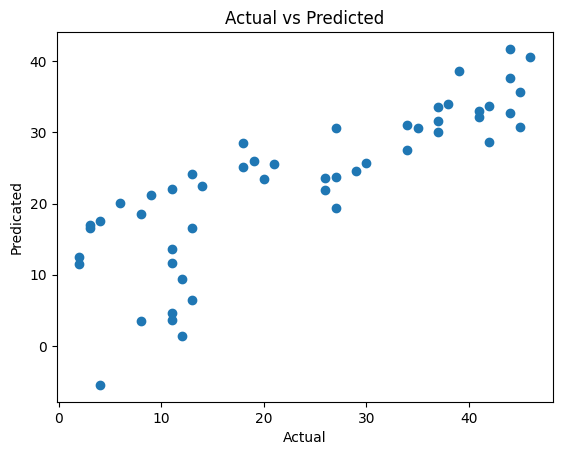

In [66]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_prad)
plt.xlabel("Actual")
plt.ylabel("Predicated")
plt.title("Actual vs Predicted")
plt.show

In [69]:
x_new = df.sample(1)

In [70]:
x_new

,Motor,Screw,Pgain,Vgain,Class
76,4,2,4,1,4


In [71]:
x_new.shape

(1, 5)

In [72]:
x_new = x_new.drop('Class', axis = 1)

In [73]:
x_new

,Motor,Screw,Pgain,Vgain
76,4,2,4,1


In [74]:
x_new.shape

(1, 4)

Prediction

In [75]:
y_prad_new = lr.predict(x_new)

In [76]:
y_prad_new

array([11.36327538])